Imports

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
df = pd.read_csv("./data/amazon_sales_report.csv", index_col=[0])

In [ ]:
df.info()
df.describe()

Limpeza do Dataframe

In [33]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0]).infer_objects(copy=False)
    else:
        df[col] = df[col].fillna(df[col].mean()).infer_objects(copy=False)

In [8]:
colunas_sem_nome = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=colunas_sem_nome)

In [9]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns = df.columns.str.lower().str.replace("-", "_")

In [10]:
df = df.drop_duplicates()

In [11]:
df.to_csv("./data/dataset_limpo.csv", index=False)

Análise exploratória de dados

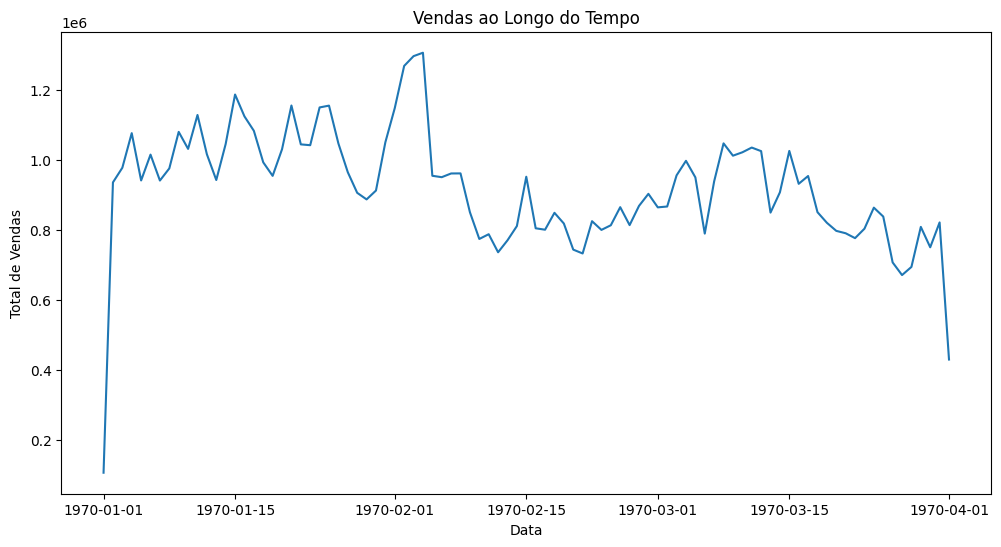

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

vendas_por_data = df.groupby('date')['amount'].sum()

plt.figure(figsize=(12,6))
plt.plot(vendas_por_data.index, vendas_por_data.values)

plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()


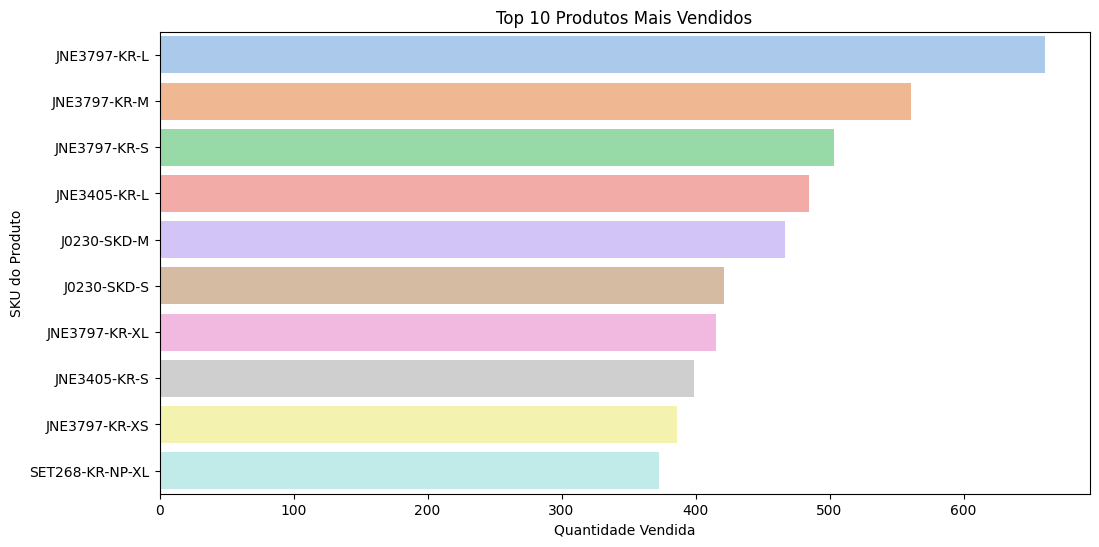

In [31]:
vendas_por_produto = df.groupby('sku')['qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=vendas_por_produto.values, y=vendas_por_produto.index, palette='pastel', hue=vendas_por_produto.index)
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('SKU do Produto')
plt.show()

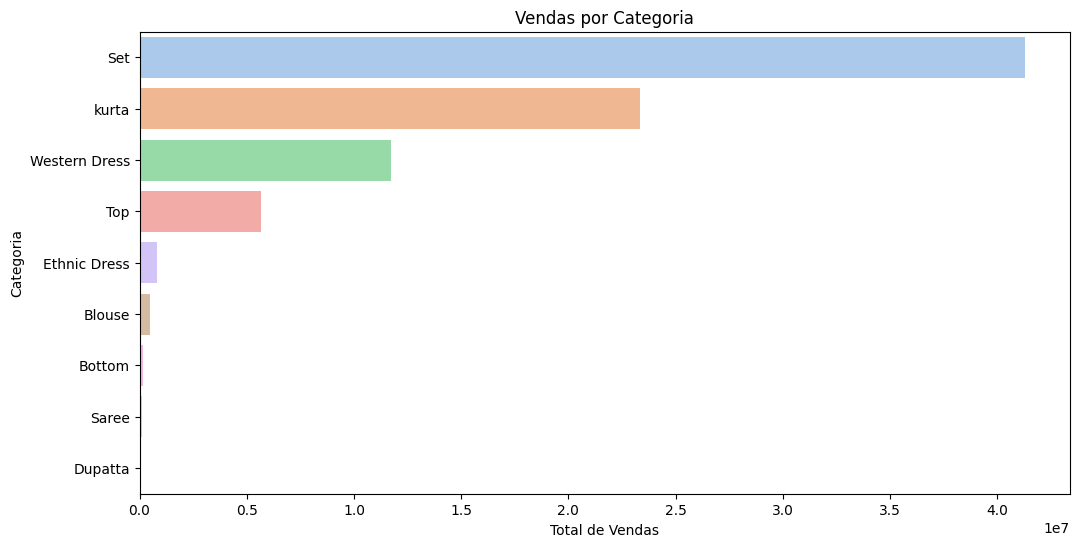

In [32]:
vendas_por_categoria = df.groupby('category')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=vendas_por_categoria.values, y=vendas_por_categoria.index, hue=vendas_por_categoria.index, palette='pastel')
plt.title('Vendas por Categoria')
plt.xlabel('Total de Vendas')
plt.ylabel('Categoria')
plt.show()

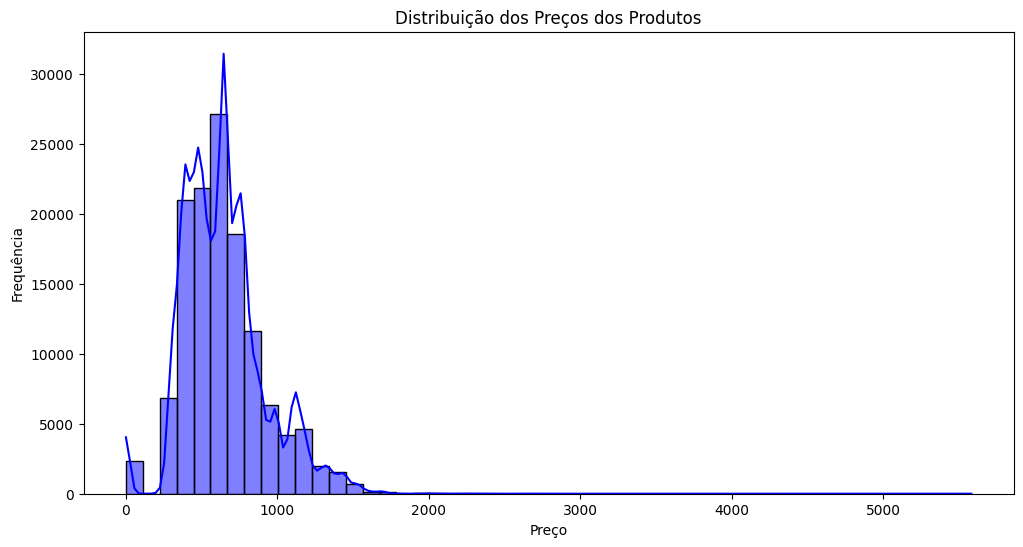

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()